<a href="https://colab.research.google.com/github/JulianOmar/Programacion_Concurrente/blob/main/TP1_Procesos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## C

## Java

[](https://)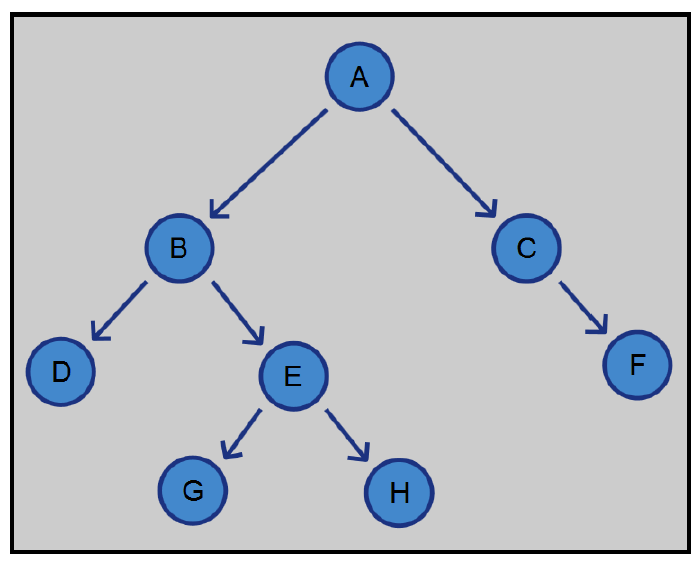

## Python

In [ ]:
%%writefile tp1_procesos.py
import os
import time

PROCESO_A = "A"
PROCESO_B = "B"
PROCESO_C = "C"
PROCESO_D = "D"
PROCESO_E = "E"
PROCESO_F = "F"
PROCESO_G = "G"
PROCESO_H = "H"
TIME_SLEEP = 200
PID_NULL = 0

def processMessage(node):
    message = "Hola mi nombre es {name}. PID: {pid}. PPID {ppid}\n"
    print(message.format(name=node,pid=os.getpid(),ppid=os.getppid()))

def spawnProcesses(node):
    pid=PID_NULL
    name,children = node
    processMessage(name)
    for item in children:
        pid=os.fork()
        if pid < PID_NULL:
            print("Error al crear nuevo proceso")
            os._exit(1)
        if not pid:
            spawnProcesses(item)
            time.sleep(TIME_SLEEP)
            os._exit(0)
    for item in children:
        os.wait()

def main():
    tree = (PROCESO_A, [(PROCESO_B,[(PROCESO_D,[]), (PROCESO_E,[(PROCESO_G,[]), (PROCESO_H,[])])]),(PROCESO_C,[(PROCESO_F,[])])])
    spawnProcesses(tree)
    os._exit(0)

main()

Writing tp1.py


In [ ]:
!touch resultado_py && chmod 700 resultado_py

In [ ]:
!nohup python3 -u tp1.py 1>resultado_py 2>/dev/null &

In [ ]:
!cat resultado_py

Hola mi nombre es A. PID: 1597. PPID 1

Hola mi nombre es B. PID: 1598. PPID 1597

Hola mi nombre es C. PID: 1599. PPID 1597

Hola mi nombre es D. PID: 1600. PPID 1598

Hola mi nombre es E. PID: 1601. PPID 1598

Hola mi nombre es F. PID: 1602. PPID 1599

Hola mi nombre es H. PID: 1604. PPID 1601

Hola mi nombre es G. PID: 1603. PPID 1601



In [ ]:
!ps -ef | grep tp1_procesos.py

root        1597       1  0 21:07 ?        00:00:00 python3 -u tp1.py
root        1598    1597  0 21:07 ?        00:00:00 python3 -u tp1.py
root        1599    1597  0 21:07 ?        00:00:00 python3 -u tp1.py
root        1600    1598  0 21:07 ?        00:00:00 python3 -u tp1.py
root        1601    1598  0 21:07 ?        00:00:00 python3 -u tp1.py
root        1602    1599  0 21:07 ?        00:00:00 python3 -u tp1.py
root        1603    1601  0 21:07 ?        00:00:00 python3 -u tp1.py
root        1604    1601  0 21:07 ?        00:00:00 python3 -u tp1.py
root        1820    1386  0 21:07 ?        00:00:00 /bin/bash -c ps -ef | grep tp1.py
root        1822    1820  0 21:07 ?        00:00:00 grep tp1.py


In [ ]:
!pstree -pc $(pgrep -f tp1_procesos.py -P 1)

python3(1597)─┬─python3(1598)─┬─python3(1600)
              │               └─python3(1601)─┬─python3(1603)
              │                               └─python3(1604)
              └─python3(1599)───python3(1602)
